#### importing libraries 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

##### importing dataset

In [2]:
data = pd.read_csv('C:/Users/User/Desktop/internship/Churn_Modelling.csv')
data.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


###### The data set has been imported and by observing the given dataset we understand that RowNumber, CustomerId, Surname,	CreditScore,	Geography,	Gender,	Age, Tenure, Balance,	NumOfProducts,	HasCrCard,	IsActiveMember,	EstimatedSalary are independent variables and Exited is a dependent variable this contains two values 0 and 1 .  1 refers to customer lefft the bank and 0 refers to customer is with the bank

In [3]:
data.shape

(10000, 14)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

###### RowNumber, CustomerId and  Surname are irreelevent features i.e these features have no effect on predection

In [7]:
column_drop=['RowNumber','CustomerId','Surname']
data.drop(columns=column_drop, inplace=True)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [9]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


##### Encoding categorical data

In [10]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [11]:
geography_mapping = {"France": 1, "Spain": 2, "Germany": 3}
data["Geography"] = data["Geography"].replace(geography_mapping)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,1,Female,42,2,0.00,1,1,1,101348.88,1
1,608,2,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,1,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,1,Female,39,1,0.00,2,0,0,93826.63,0
4,850,2,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
Gender_mapping = {"Female": 0, "Male": 1}
data["Gender"] = data["Gender"].replace(Gender_mapping)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,1,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,1,0,42,8,159660.80,3,1,0,113931.57,1
3,699,1,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


##### visualizing dependent data

In [13]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

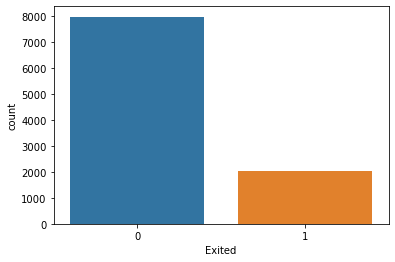

In [14]:
sns.countplot(data=data, x='Exited')
plt.show()

In [15]:
x = data.drop('Exited',axis=1)
y=data['Exited']

In [16]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

##### spliting the data set into train and test

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=2)

###### feature scaling

In [18]:
sc=StandardScaler()

In [19]:
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [20]:
x_train

array([[ 0.40603944, -0.90780003, -1.08690612, ...,  0.64864693,
        -1.03756212, -0.67996046],
       [-1.05419348,  1.48790222, -1.08690612, ...,  0.64864693,
        -1.03756212, -1.63593021],
       [-2.13124471, -0.90780003, -1.08690612, ...,  0.64864693,
         0.96379771,  0.47575929],
       ...,
       [ 2.06304133, -0.90780003,  0.92004266, ...,  0.64864693,
        -1.03756212,  1.63862882],
       [-1.03348096,  1.48790222,  0.92004266, ...,  0.64864693,
        -1.03756212,  1.32053662],
       [ 0.03321401, -0.90780003, -1.08690612, ...,  0.64864693,
        -1.03756212,  0.88093201]])

##### Logistic Regression

In [21]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [22]:
# Model evaluation
prediction_on_training_data = model.predict(x_train)
accuracy_on_training_data = accuracy_score(y_train, prediction_on_training_data)

prediction_on_test_data = model.predict(x_test)
accuracy_on_test_data = accuracy_score(y_test, prediction_on_test_data)

# Print accuracy
print('Accuracy on training data: {} %'.format(accuracy_on_training_data * 100))
print('Accuracy on test data: {} %'.format(accuracy_on_test_data * 100))

Accuracy on training data: 81.05714285714286 %
Accuracy on test data: 80.66666666666666 %


[[2306  109]
 [ 471  114]]


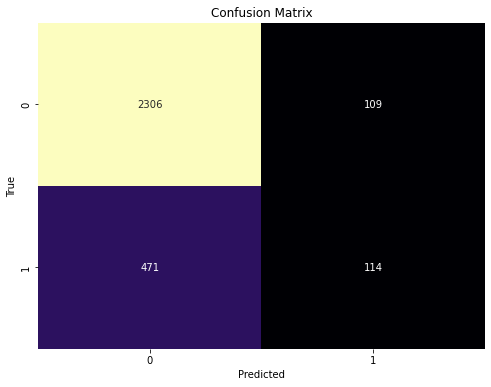

In [23]:
cm = confusion_matrix(y_test,prediction_on_test_data)
print (cm)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d',cmap="magma", cbar=False)
plt.xlabel("Predicted")
plt.ylabel('True')
plt.title("Confusion Matrix")
plt.show()

##### Gradient Boosting Classifier

In [24]:
from sklearn.ensemble import GradientBoostingClassifier

In [25]:
model = GradientBoostingClassifier()
model.fit(x_train,y_train)

GradientBoostingClassifier()

In [26]:
# Model evaluation
prediction_on_training_data = model.predict(x_train)
accuracy_on_training_data = accuracy_score(y_train, prediction_on_training_data)

prediction_on_test_data = model.predict(x_test)
accuracy_on_test_data = accuracy_score(y_test, prediction_on_test_data)

# Print accuracy
print('Accuracy on training data: {} %'.format(accuracy_on_training_data * 100))
print('Accuracy on test data: {} %'.format(accuracy_on_test_data * 100))

Accuracy on training data: 87.64285714285714 %
Accuracy on test data: 86.33333333333333 %


[[2327   88]
 [ 322  263]]


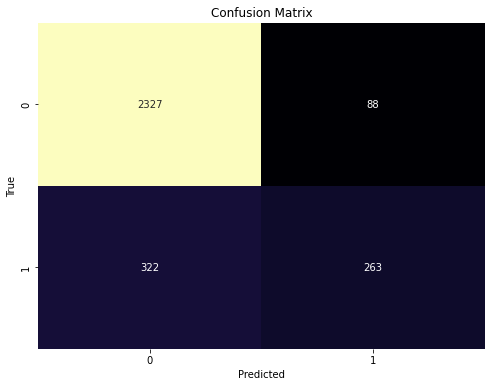

In [27]:
cm = confusion_matrix(y_test,prediction_on_test_data)
print (cm)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d',cmap="magma", cbar=False)
plt.xlabel("Predicted")
plt.ylabel('True')
plt.title("Confusion Matrix")
plt.show()

##### Random Forest Classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
model = RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [30]:
# Model evaluation
prediction_on_training_data = model.predict(x_train)
accuracy_on_training_data = accuracy_score(y_train, prediction_on_training_data)

prediction_on_test_data = model.predict(x_test)
accuracy_on_test_data = accuracy_score(y_test, prediction_on_test_data)

# Print accuracy
print('Accuracy on training data: {} %'.format(accuracy_on_training_data * 100))
print('Accuracy on test data: {} %'.format(accuracy_on_test_data * 100))

Accuracy on training data: 100.0 %
Accuracy on test data: 86.3 %


[[2326   89]
 [ 322  263]]


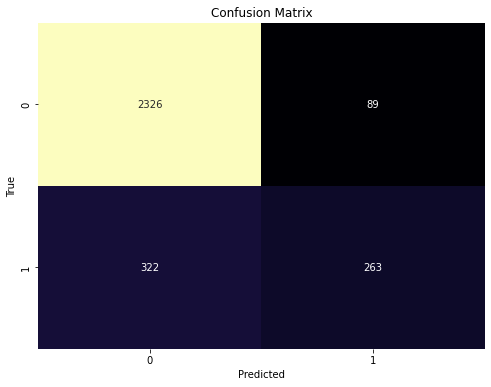

In [31]:
cm = confusion_matrix(y_test,prediction_on_test_data)
print (cm)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d',cmap="magma", cbar=False)
plt.xlabel("Predicted")
plt.ylabel('True')
plt.title("Confusion Matrix")
plt.show()

In [32]:
import joblib

In [33]:
joblib.dump(model,'churn_predict_model')

['churn_predict_model']

In [34]:
model=joblib.load('churn_predict_model')

In [35]:
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [36]:
model.predict([[700,2,1,25,2,10000,10,1,1,200000,]])

array([1], dtype=int64)